<h1 align=center id="data_acquisition"> Data types</h1>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    
<p>
Data types are one of those things that you don’t tend to care about (if the dataframe is built correctly) until you get an error or some unexpected results. It is also one of the first things you should check once you load a new data into pandas for further analysis.

In [1]:
import pandas as pd

In [ ]:
df = pd.read_excel('datos_auto2.xlsx')

In [ ]:
df.head()

In [ ]:
df.describe()
# df.describe(include = "all")

In [ ]:
del df['Unnamed: 0']

<div class="alert alert-block alert-info" style="margin-top: 20px">
    There are basically 5 types of data:
<ul>
    <li> <b>int64</b>, Integer numbers</li>
    <li> <b>float64</b>, Floating point numbers </li>
    <li> <b>object</b>, Text or mixed numeric and non-numeric values</li>
    <li> <b>bool</b>, True/False values</li>
    <li> <b>datetime64</b>, Date and time values </li>
</ul></b>

In [ ]:
df.dtypes

In [ ]:
df.info()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <b>astype()</b>, change the data type of a column (NOTE: the output is a <i>view</i>, you must assign the output to the column)

In [ ]:
df['highway-mpg'].astype('float64')
# df['city-mpg'] = df['city-mpg'].astype('float64')
df['highway-mpg'].dtype

In [ ]:
# A type ‘O’ just stands for “object” 
df['body-style'].dtype

In [ ]:
df['city-L/100km']

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <b>Change column values</b>

In [ ]:
# 1 mpg =  235,215 L/100km
df['city-L/100km']
df['city-L/100km'] = 235.215 / df['city-mpg']
df['city-L/100km']

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <b>Change column names</b>

In [ ]:
# Bad column name (return a new DataFrame)
df.rename(columns={'height':'height(in)'}, inplace=True)
df.columns

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h2> Missing Data</h2>
    
As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. While NaN is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object.
    

<ul>
    <li> <b>NaN</b>, Not a Number</li>
    <li> <b>NaT</b>, Not a Time </li>
</ul>
<p>
    <h4> NA handling methods:</h4>
<ul>
    <li> <b>isna()</b>, return like-type object containing boolean values indicanting which values are missing /NA (it can also be referred to as <b>isnull()</b>, but in numpy is <b>isnan()</b>)</li>
    <li> <b>notna()</b>, the negation of <i>isnull</i> (also referred to as <b>notnull()</b>)</li>
    <li> <b>dropna()</b>, filter axis labels based on whether values for each label have missing data </li>
    <li> <b>fillna()</b>, fill in missing data with a constant value or the previous (<i>method='ffill'</i>), or the next value (<i>method='bfill'</i>) </li>
</ul>    

In [ ]:
df.loc[9]

In [ ]:
df.loc[9,'num-of-doors']

In [ ]:
df.loc[df['num-of-doors']=='two','price']

<div class="alert alert-block alert-info" style="margin-top: 20px">

<h2> Warning</h2>
    
One has to be mindful that in Python (and NumPy), the nan's don’t compare equal, but None's do. Note that pandas/NumPy uses the fact that np.nan != np.nan, and treats None like np.nan.


In [ ]:
import numpy as np
np.nan == np.nan

In [ ]:
df.loc[:10,['num-of-doors', 'city-mpg']].isna()

In [ ]:
df.loc[:10,['num-of-doors', 'city-mpg']].notna()

In [ ]:
## Bad solution
df.loc[:10,['num-of-doors', 'city-mpg']]==np.nan

In [ ]:
df_doors = df[df['num-of-doors'].notna()]
df_doors.head(10)

<div class="alert alert-block alert-info" style="margin-top: 20px">

With DataFrame objects you may want to <b>drop</b> rows or columns which are all NA of just those containing any NAs

In [ ]:
import numpy as np
nan = np.nan

In [ ]:
type(nan)

In [ ]:
df2 = pd.DataFrame([[1.0, 2.4, 0.35],[0.5,nan, 2.7],[nan, nan, nan],[nan, 6.5, 2.1]])
df2

In [ ]:
df2.dropna()

In [ ]:
df2.dropna(how='all')

<div class="alert alert-block alert-info" style="margin-top: 20px">

Dropping columns in the same way with a parameter: <i>axis=1</i> or <i>axis='columns'</i>

In [ ]:
df2.dropna(how='all', axis='columns')

<div class="alert alert-block alert-info" style="margin-top: 20px">

Keeping row/columns with a minimum number of observations: <b>.dropna</b>(<i>thresh=n</i>)

In [ ]:
df2.dropna(axis=1, thresh=3)

In [ ]:
df_doors['hybrid'].isna().count()

In [ ]:
df_doors2 = df_doors.drop('hybrid', axis=1)

In [ ]:
df_doors2.columns

In [ ]:
df_doors2.head(10)

<div class="alert alert-block alert-info" style="margin-top: 20px">

<h3>Filling in Missing Data </h3>
    
Rather than filtering out missing data, you may want to fill in the "holes" with a constant value or by the previous value ('ffill') or the next value ('bfill'). This method is only valid for columns.

In [ ]:
df2b = df2.copy()

In [ ]:
df2.fillna(0)

In [ ]:
df2

In [ ]:
df2b.fillna(0, inplace=True)
df2b

In [ ]:
#limit the number of replacements
df2.fillna(axis=0, method='ffill', limit=1)

In [ ]:
df2.fillna(df2.mean())

In [ ]:
df2

<div class="alert alert-block alert-info" style="margin-top: 20px">

Handling a large database...

In [3]:
# df0 = pd.read_csv('data\OpenFoodFacts\en.openfoodfacts.org.products.tsv', sep='\t')
# DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types
# Da error porque hay tipos mezclados!!!!
# 
df0 = pd.read_csv('data\OpenFoodFacts\en.openfoodfacts.org.products.tsv', sep='\t', dtype=str)

<div class="alert alert-block alert-info" style="margin-top: 20px">

¡¡ OJO !! Todas las columnas son de tipo "Strig"

In [ ]:
# for i in range(len(df0.columns)):
#     print(df0.dtypes[i] )

In [4]:
df0.columns[:90]

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size',
       'no_nutriments', 'additives_n', 'additives', 'additives_tags',
       'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

In [5]:
#Buscamos los que realmente son alimentos (energy_100g != NaN)
df0['energy_100g']

0          NaN
1         2243
2         1941
3         2540
4         1552
          ... 
356022       0
356023     NaN
356024     NaN
356025     NaN
356026    2092
Name: energy_100g, Length: 356027, dtype: object

In [6]:
df0['energy_100g'].count()

295367

In [7]:
df1 = df0.copy()

In [8]:
ind_zero = df1[df1['energy_100g'].isna()].index
ind_zero

Int64Index([     0,     25,     46,     47,     49,     51,     73,     99,
               108,    138,
            ...
            356014, 356015, 356016, 356018, 356019, 356020, 356021, 356023,
            356024, 356025],
           dtype='int64', length=60660)

In [11]:
# Drop rows with NaN values in column 'energy_100g'
df1_energy = df1.drop(df1[df1['energy_100g'].isna()].index, axis=0)
df1_energy['energy_100g']

1         2243
2         1941
3         2540
4         1552
5         1933
          ... 
356005    1643
356010    2406
356017      21
356022       0
356026    2092
Name: energy_100g, Length: 295367, dtype: object

In [12]:
# Select products with "generic_name"
df1_generic = df1_energy[df1_energy['generic_name'].notna()].copy()
df1_generic['generic_name']

## only 48300 !!!

176                                        Laitue en salade
177                                             Pâtisserie 
182                                              Pâtisserie
183                                                    Pain
187                                         Quiche lorraine
                                ...                        
355906                          tuna chunks in spring water
355930                                    Microwave Popcorn
355940                     Ядра семян подсолнечника жареные
355966    Bière blanche artisanale sur lie non filtrée n...
356017                                    thé bio équitable
Name: generic_name, Length: 48300, dtype: object

In [14]:
# Select 'generic_names' with alphanumeric values (and only one word)
df1_alnum2 = df1_generic[df1_generic['generic_name'].str.isalnum()]
df1_alnum2['generic_name']

##only 2821 !!!

182             Pâtisserie
183                   Pain
223       Pralinenmischung
244            Cauliflower
686               Herrings
                ...       
355635           Gaufrette
355651               Water
355758            céréales
355849             Oatmeal
355889           Ajoaceite
Name: generic_name, Length: 2821, dtype: object

In [15]:
#Remove products with additives. 'additives_n': number of additives
df1_alnum2.loc[:20000,'additives_n']

182       5
183       0
223       3
244       0
686       1
9895      1
10596     0
11163    10
11424     0
13199     0
13608     0
16779     1
16793     3
19992     0
Name: additives_n, dtype: object

In [16]:
df1_alnum2.loc[355651,'additives_n'] 

nan

In [17]:
## values are "string" (not integer)
df1_alnum3 = df1_alnum2[df1_alnum2['additives_n']=='0']
df1_alnum3['additives_n']

#only 1320 !!

183       0
244       0
10596     0
11424     0
13199     0
         ..
355199    0
355343    0
355416    0
355849    0
355889    0
Name: additives_n, Length: 1320, dtype: object

In [18]:
#Look for 'categories'
df1_alnum3.loc[:900000,'categories_en']

183                                             fr:Boulange
244       Plant-based foods and beverages,Plant-based fo...
10596     Plant-based foods and beverages,Plant-based fo...
11424     Plant-based foods and beverages,Plant-based fo...
13199                                                   NaN
                                ...                        
355199    Spreads,Breakfasts,Sweet spreads,Bee products,...
355343                             Sugary snacks,Chocolates
355416                      Dairies,Cheeses,Italian cheeses
355849    Plant-based foods and beverages,Plant-based fo...
355889                                     fr:Sauce-a-l-ail
Name: categories_en, Length: 1320, dtype: object

In [19]:
# df2_plants = df1_alnum3[df1_alnum3['categories_en'].str.contains('Plant')]
## ValueError: Cannot mask with non-boolean array containing NA / NaN values

S_categ = df1_alnum3.loc[df1_alnum3['categories_en'].notna(), 'categories_en']
# df1_sin_add  = df1_alnum3[df1_alnum3['additives_n']==0]
print(type(S_categ))
print(S_categ[183])

<class 'pandas.core.series.Series'>
fr:Boulange


In [22]:
#Select categories (in english) containing the word "Plant"
S_plant = S_categ[S_categ.str.contains('Plant')]
S_plant

## only 554 !!

244       Plant-based foods and beverages,Plant-based fo...
10596     Plant-based foods and beverages,Plant-based fo...
11424     Plant-based foods and beverages,Plant-based fo...
24778     Plant-based foods and beverages,Plant-based fo...
32691     Plant-based foods and beverages,Plant-based fo...
                                ...                        
351454    Plant-based foods and beverages,Plant-based fo...
351682    Plant-based foods and beverages,Plant-based fo...
352962    Plant-based foods and beverages,Plant-based fo...
355073    Plant-based foods and beverages,Plant-based fo...
355849    Plant-based foods and beverages,Plant-based fo...
Name: categories_en, Length: 554, dtype: object

In [23]:
df2_plants = df1_alnum3.copy()
df2_plants = df2_plants.loc[S_plant.index]

In [24]:
df2_plants['categories_en']

244       Plant-based foods and beverages,Plant-based fo...
10596     Plant-based foods and beverages,Plant-based fo...
11424     Plant-based foods and beverages,Plant-based fo...
24778     Plant-based foods and beverages,Plant-based fo...
32691     Plant-based foods and beverages,Plant-based fo...
                                ...                        
351454    Plant-based foods and beverages,Plant-based fo...
351682    Plant-based foods and beverages,Plant-based fo...
352962    Plant-based foods and beverages,Plant-based fo...
355073    Plant-based foods and beverages,Plant-based fo...
355849    Plant-based foods and beverages,Plant-based fo...
Name: categories_en, Length: 554, dtype: object

In [25]:
df2_plants['ingredients_text']

244                                             Cauliflower
10596                                  Durum Wheat Semolina
11424     pistaches 96%, sel 2%, poivre, sucre, poudre d...
24778                             Seminola and durum flour 
32691                     Hojuelas de avena de grano entero
                                ...                        
351454                                               Longan
351682                                             tamarins
352962    fruits*40% raisin de Smyrne* ( raisins de Smyr...
355073    Durum semolina, beef (16%), water, breadcrumbs...
355849                                            100% Oats
Name: ingredients_text, Length: 554, dtype: object

<div class="alert alert-block alert-info" style="margin-top: 20px">

Ejercicio:
Buscar los que tengan un único ingrediente


<div class="alert alert-block alert-info" style="margin-top: 20px">

Ejercicio:
Filtrar por 'pnns_group_1' o 'pnns_groups_2'

In [26]:
#save the 'small' DataFrame
df2_plants.to_excel('OpenFoodFact_plants.xlsx')

<div class="alert alert-block alert-info" style="margin-top: 20px">

<h3> DateTime type </h3>
pandas contains extensive capabilities and features for working with time series data for all domains. For example:

<ul>
    <li>Manipulating and converting date times with timezone information</li>
    <li>Performing date and time arithmetic with absolute or relative time increments</li>
    <li> ... </li>
</ul>
    
<b>pd.to_datetime()</b> converts Series into <i>datetime</i> type. If you use dates which start with the day first (i.e. European style), you can pass the dayfirst flag ("dayfirst=True")
<p>
https://pandas.pydata.org/docs/user_guide/timeseries.html

In [27]:
df2_plants['created_datetime']

244       2014-09-01T14:48:04Z
10596     2015-04-07T15:23:18Z
11424     2015-04-14T08:42:18Z
24778     2015-02-22T04:33:38Z
32691     2017-07-31T00:54:07Z
                  ...         
351454    2017-07-27T05:27:37Z
351682    2016-04-09T14:56:50Z
352962    2016-10-24T06:52:01Z
355073    2015-03-02T08:57:40Z
355849    2014-10-11T16:23:12Z
Name: created_datetime, Length: 554, dtype: object

In [28]:
## Change type to "datetime64"
serie_date = pd.to_datetime(df2_plants.loc[:,'created_datetime']).copy()
serie_date

244      2014-09-01 14:48:04+00:00
10596    2015-04-07 15:23:18+00:00
11424    2015-04-14 08:42:18+00:00
24778    2015-02-22 04:33:38+00:00
32691    2017-07-31 00:54:07+00:00
                    ...           
351454   2017-07-27 05:27:37+00:00
351682   2016-04-09 14:56:50+00:00
352962   2016-10-24 06:52:01+00:00
355073   2015-03-02 08:57:40+00:00
355849   2014-10-11 16:23:12+00:00
Name: created_datetime, Length: 554, dtype: datetime64[ns, UTC]

In [29]:
df2_plants.loc[:,'created_datetime2'] = serie_date

In [32]:
df2_plants['created_datetime2']

244      2014-09-01 14:48:04+00:00
10596    2015-04-07 15:23:18+00:00
11424    2015-04-14 08:42:18+00:00
24778    2015-02-22 04:33:38+00:00
32691    2017-07-31 00:54:07+00:00
                    ...           
351454   2017-07-27 05:27:37+00:00
351682   2016-04-09 14:56:50+00:00
352962   2016-10-24 06:52:01+00:00
355073   2015-03-02 08:57:40+00:00
355849   2014-10-11 16:23:12+00:00
Name: created_datetime2, Length: 554, dtype: datetime64[ns, UTC]

In [35]:
serie_date2 = pd.to_datetime(df2_plants['last_modified_datetime'], infer_datetime_format=True, utc=True).copy()


In [39]:
serie_date2

244      2015-02-23 10:38:56+00:00
10596    2015-04-07 15:31:32+00:00
11424    2015-04-14 14:25:27+00:00
24778    2015-08-09 17:35:52+00:00
32691    2017-09-10 18:23:44+00:00
                    ...           
351454   2017-07-27 05:34:29+00:00
351682   2017-03-27 19:56:30+00:00
352962   2017-08-02 14:03:15+00:00
355073   2015-03-02 09:10:33+00:00
355849   2014-10-11 17:25:07+00:00
Name: last_modified_datetime, Length: 554, dtype: datetime64[ns, UTC]

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
<b>.dt accessor</b>: Accessor object for datetimelike properties of the Series values. For example, you can access to "hour", "minute", "month", "year", or "date".
<p>

<b>datetime.striptime()</b> creates a datetime object from a string representing a date and time and a corresponding format string.    The format code can be found in https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [51]:
#change format of datetime
df2_plants['last_modified_datetime2'] = serie_date2.dt.strftime('%d-%m-%Y')
df2_plants['last_modified_datetime2']

244       23-02-2015
10596     07-04-2015
11424     14-04-2015
24778     09-08-2015
32691     10-09-2017
             ...    
351454    27-07-2017
351682    27-03-2017
352962    02-08-2017
355073    02-03-2015
355849    11-10-2014
Name: last_modified_datetime2, Length: 554, dtype: object

In [52]:
#to get the day of the week
df2_plants['last_modified_date_week']=serie_date2.dt.day_name()
df2_plants['last_modified_date_week']

244          Monday
10596       Tuesday
11424       Tuesday
24778        Sunday
32691        Sunday
            ...    
351454     Thursday
351682       Monday
352962    Wednesday
355073       Monday
355849     Saturday
Name: last_modified_date_week, Length: 554, dtype: object

<div class="alert alert-block alert-info" style="margin-top: 20px">

<h3> <i>timedelta64</i> - data type</h3>

In [56]:
# The difference between two datetime64 data is a timedelta64
# df2_plants['elapse_time']=df2_plants['last_modified_datetime']- df2_plants['created_datetime']
# df2_plants['elapse_time']=df2_plants['last_modified_datetime2']- df2_plants['created_datetime2']

In [54]:
# Caution!!! It's a STRING
df2_plants['last_modified_datetime2']

244       23-02-2015
10596     07-04-2015
11424     14-04-2015
24778     09-08-2015
32691     10-09-2017
             ...    
351454    27-07-2017
351682    27-03-2017
352962    02-08-2017
355073    02-03-2015
355849    11-10-2014
Name: last_modified_datetime2, Length: 554, dtype: object

In [66]:
df2_plants['last_modified_datetime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 554 entries, 244 to 355849
Series name: last_modified_datetime
Non-Null Count  Dtype 
--------------  ----- 
554 non-null    object
dtypes: object(1)
memory usage: 8.7+ KB


In [55]:
df2_plants['created_datetime2']

244      2014-09-01 14:48:04+00:00
10596    2015-04-07 15:23:18+00:00
11424    2015-04-14 08:42:18+00:00
24778    2015-02-22 04:33:38+00:00
32691    2017-07-31 00:54:07+00:00
                    ...           
351454   2017-07-27 05:27:37+00:00
351682   2016-04-09 14:56:50+00:00
352962   2016-10-24 06:52:01+00:00
355073   2015-03-02 08:57:40+00:00
355849   2014-10-11 16:23:12+00:00
Name: created_datetime2, Length: 554, dtype: datetime64[ns, UTC]

In [60]:
## In order to substract datetimes, use parameters "infer_datetime_format", and 'utc'
df2_plants['elapse_time']= pd.to_datetime(df2_plants.loc[:,'last_modified_datetime2'], infer_datetime_format=True, utc=True)- df2_plants['created_datetime2']

In [61]:
df2_plants['elapse_time']

244      174 days 09:11:56
10596    -1 days +08:36:42
11424    -1 days +15:17:42
24778    167 days 19:26:22
32691     40 days 23:05:53
                ...       
351454   -1 days +18:32:23
351682   351 days 09:03:10
352962   281 days 17:07:59
355073   -1 days +15:02:20
355849   -1 days +07:36:48
Name: elapse_time, Length: 554, dtype: timedelta64[ns]

In [62]:
df2_plants['elapse_time'] = df2_plants['elapse_time'].copy().dt.days

In [63]:
df2_plants['elapse_time']

244       174
10596      -1
11424      -1
24778     167
32691      40
         ... 
351454     -1
351682    351
352962    281
355073     -1
355849     -1
Name: elapse_time, Length: 554, dtype: int64

In [65]:
df2_plants.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,created_datetime2,last_modified_datetime3,last_modified_date_week,last_modified_datetime2,elapse_time
244,00000758,http://world-en.openfoodfacts.org/product/0000...,tacinte,1409582884,2014-09-01T14:48:04Z,1424687936,2015-02-23T10:38:56Z,Cauliflower,Cauliflower,1,...,NaN,NaN,NaN,NaN,NaN,2014-09-01 14:48:04+00:00,23-02-2015,Monday,23-02-2015,174
10596,00126410,http://world-en.openfoodfacts.org/product/0012...,kaman,1428420198,2015-04-07T15:23:18Z,1428420692,2015-04-07T15:31:32Z,Orzo by Sainsbury's,Orzo,500 g,...,NaN,-4,-4,NaN,NaN,2015-04-07 15:23:18+00:00,07-04-2015,Tuesday,07-04-2015,-1
11424,0014113912112,http://world-en.openfoodfacts.org/product/0014...,domdom26,1429000938,2015-04-14T08:42:18Z,1429021527,2015-04-14T14:25:27Z,Pistachios salt & pepper,Pistache,150 g,...,NaN,23,23,NaN,NaN,2015-04-14 08:42:18+00:00,14-04-2015,Tuesday,14-04-2015,-1
24778,0029243050351,http://world-en.openfoodfacts.org/product/0029...,kp757,1424579618,2015-02-22T04:33:38Z,1439141752,2015-08-09T17:35:52Z,Macaroni Elbows No. 35,Macaroni,1 lb,...,NaN,-4,-4,NaN,NaN,2015-02-22 04:33:38+00:00,09-08-2015,Sunday,09-08-2015,167
32691,0036731135513,http://world-en.openfoodfacts.org/product/0036...,openfoodfacts-contributors,1501462447,2017-07-31T00:54:07Z,1505067824,2017-09-10T18:23:44Z,Hojuelas de avena natural,Avena,510 g,...,NaN,-6,-6,NaN,NaN,2017-07-31 00:54:07+00:00,10-09-2017,Sunday,10-09-2017,40


In [ ]:
import numpy as np

<h2> Extracting Images</h2>

In [68]:
serie_imag = df2_plants.loc[df2_plants['image_small_url'].notnull(), 'image_small_url']
# serie_imag
image1_url = serie_imag.iloc[0]
print(image1_url)


http://en.openfoodfacts.org/images/products/00000758/front.9.200.jpg


In [69]:
import requests, io
import matplotlib.pyplot as plt 

# fig = plt.subplot(10,10)
images = []
for image_url in list(serie_imag)[:16]:
    print(image_url)
    response = requests.get(image_url).content
    images.append(plt.imread(io.BytesIO(response), format='JPG'))
#     plt.imshow(img)

http://en.openfoodfacts.org/images/products/00000758/front.9.200.jpg
http://en.openfoodfacts.org/images/products/00126410/front.3.200.jpg
http://en.openfoodfacts.org/images/products/001/411/391/2112/front.6.200.jpg
http://en.openfoodfacts.org/images/products/002/924/305/0351/front.4.200.jpg
http://en.openfoodfacts.org/images/products/007/225/100/0603/front.6.200.jpg
http://en.openfoodfacts.org/images/products/007/323/402/0083/front.4.200.jpg
http://en.openfoodfacts.org/images/products/007/703/400/9880/front.12.200.jpg
http://en.openfoodfacts.org/images/products/01095678/front.7.200.jpg
http://en.openfoodfacts.org/images/products/01150421/front.5.200.jpg
http://en.openfoodfacts.org/images/products/01199246/front.8.200.jpg
http://en.openfoodfacts.org/images/products/022/762/801/3582/front.3.200.jpg
http://en.openfoodfacts.org/images/products/03041314/front.4.200.jpg
http://en.openfoodfacts.org/images/products/03201985/front.6.200.jpg
http://en.openfoodfacts.org/images/products/03231296/f

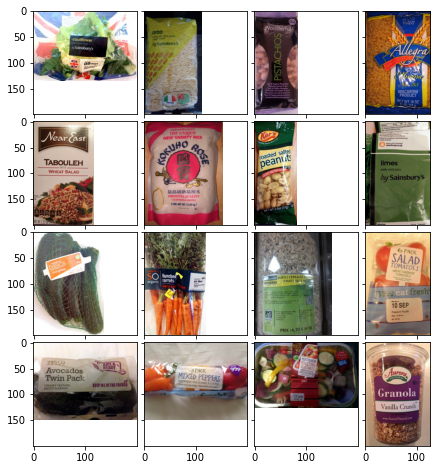

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


fig = plt.figure(figsize=(32., 8.))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()